## 1. Load basic modules 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from sklearn.naive_bayes import GaussianNB



# 2.Load CSV 

In [2]:
data = pd.read_csv("../documents/data_both_scores.csv")
data.head(20)

,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,AgeinYr,bmi,fram,esc
0,f,110.0,80.0,normal,normal,no,no,yes,0,50,21.97,15,2
1,m,140.0,90.0,high,normal,no,no,yes,1,55,34.93,15,10
2,m,130.0,70.0,high,normal,no,no,no,1,51,23.51,12,6
3,f,150.0,100.0,normal,normal,no,no,yes,1,48,28.71,17,2
4,m,100.0,60.0,normal,normal,no,no,no,0,47,23.01,17,2
5,m,120.0,80.0,bordering,prediabetes,no,no,no,0,60,29.38,12,9
6,m,130.0,80.0,high,normal,no,no,yes,0,60,37.73,16,10
7,f,130.0,90.0,high,diabetes,no,no,yes,1,61,29.98,16,6
8,m,110.0,70.0,normal,normal,no,no,yes,0,48,28.44,11,3
9,m,110.0,60.0,normal,normal,no,no,no,0,54,25.28,12,3


# 3.Feature Engineering (categorical and numerical variables)

In [3]:
data['cardio'] = data['cardio'].replace({0: 'No',  1: 'Yes'})


In [4]:
categorical_columns = [col for col in data.columns if data[col].dtypes == 'object']

categorical_columns

['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio']

In [5]:
numerical_columns = [col for col in data.columns if data[col].dtypes != 'object']

numerical_columns

['ap_hi', 'ap_lo', 'AgeinYr', 'bmi', 'fram', 'esc']

In [6]:
for col in categorical_columns:
    data[col] = data[col].str.strip()

In [7]:
X = data.drop(['cardio'], axis=1)

Y = data['cardio']

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 1237)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(47151, 12)
(20208, 12)
(47151,)
(20208,)


In [9]:
encoder_categories = []

X_categorical_columns = [x for x in categorical_columns if x != 'cardio']

for col in X_categorical_columns:    
    col_categories = data[col].unique()
    encoder_categories.append(col_categories)

encoder_categories

[array(['f', 'm'], dtype=object),
 array(['normal', 'high', 'bordering'], dtype=object),
 array(['normal', 'prediabetes', 'diabetes'], dtype=object),
 array(['no', 'yes'], dtype=object),
 array(['no', 'yes'], dtype=object),
 array(['yes', 'no'], dtype=object)]

In [10]:
encoder = OneHotEncoder(categories = encoder_categories, sparse=False)

encoder = encoder.fit(X_train[X_categorical_columns])

    
X_train_encoded = encoder.transform(X_train[X_categorical_columns])
X_train_categorical = pd.DataFrame(X_train_encoded, columns = encoder.get_feature_names(X_categorical_columns))

X_test_encoded = encoder.transform(X_test[X_categorical_columns])
X_test_categorical = pd.DataFrame(X_test_encoded, columns = encoder.get_feature_names(X_categorical_columns))
X_test_categorical.head()

,gender_f,gender_m,cholesterol_normal,cholesterol_high,cholesterol_bordering,gluc_normal,gluc_prediabetes,gluc_diabetes,smoke_no,smoke_yes,alco_no,alco_yes,active_yes,active_no
0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [11]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

X_train_scaled = scaler.fit_transform(X_train[numerical_columns])
X_train_numerical = pd.DataFrame(X_train_scaled, columns = numerical_columns)
X_train_numerical.head()

X_test_scaled = scaler.transform(X_test[numerical_columns])
X_test_numerical = pd.DataFrame(X_test_scaled, columns = numerical_columns)
X_test_numerical.head()

,ap_hi,ap_lo,AgeinYr,bmi,fram,esc
0,0.90,0.8,0.6,-0.127419,1.00,0.00
1,1.25,0.3,0.3,-0.093548,0.25,1.25
2,0.00,-1.0,-1.0,-0.570968,-1.25,-0.75
3,1.05,1.0,-0.9,0.885484,0.25,-1.00
4,0.00,0.0,-0.8,-0.558065,-1.25,-0.50


In [12]:
Y_train_concat = Y_train.reset_index(drop=True)
Y_test_concat = Y_test.reset_index(drop=True)

data_train = pd.concat([X_train_categorical, X_train_numerical, Y_train_concat], axis=1)

data_test = pd.concat([X_test_categorical, X_test_numerical, Y_test_concat], axis=1)



In [13]:

data_train['cardio'] = data_train['cardio'].replace({'No': 0,  'Yes': 1})
data_test['cardio'] = data_test['cardio'].replace({'No': 0,  'Yes': 1})


In [14]:
X_train = data_train.drop('cardio', axis = 1)
X_test = data_test.drop('cardio', axis = 1)

Y_train = data_train.cardio
Y_test = data_test.cardio



## 4.Logistic Regression Model Fitting


In [15]:
gnb = GaussianNB()

gnb.fit(X_train, Y_train)

GaussianNB()

### Predicting the test set results and calculating the accuracy


In [16]:
Y_pred = gnb.predict(X_test)



Text(33.0, 0.5, 'Reales')

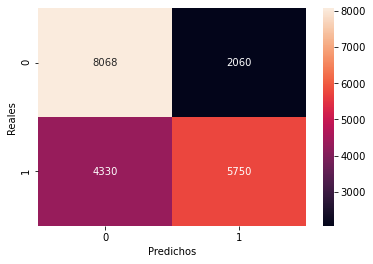

In [17]:
sns.heatmap(confusion_matrix(Y_test, Y_pred), annot=True, fmt='4d')
plt.xlabel('Predichos')
plt.ylabel('Reales')

In [18]:
print("Accuracy: ", accuracy_score(Y_test, Y_pred).round(2))
print("F1 Score: ", f1_score(Y_test, Y_pred).round(2))
print('precision_score: ', precision_score(Y_test, Y_pred).round(2))
print('recall_score: ', recall_score(Y_test, Y_pred).round(2))
print('MSE: ', mean_squared_error(Y_test, Y_pred).round(3))

Accuracy:  0.68
F1 Score:  0.64
precision_score:  0.74
recall_score:  0.57
MSE:  0.316


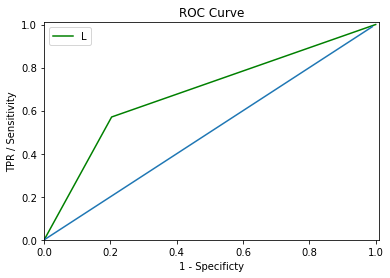

In [19]:
fpr_lr,tpr_lr,thr_lr = roc_curve(Y_test, Y_pred)

plt.axis([0, 1.01, 0, 1.01])
plt.xlabel('1 - Specificty')
plt.ylabel('TPR / Sensitivity')
plt.title('ROC Curve')
plt.plot(fpr_lr, tpr_lr, 'g')
plt.legend('LR')
plt.plot(np.arange(0,1, step =0.01), np.arange(0,1, step =0.01))
plt.show()

In [20]:
print('AUC=', round(auc(fpr_lr, tpr_lr),2))

AUC= 0.68
